In [345]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [531]:
dtypes_dict = {'created':'str', 'application_id': 'category', 'ref_type': 'category', 'device_brand': np.float32, \
                'device_countrycode': 'category', 'device_languaje': 'category'}

installs = pd.read_csv('data/train_installs.csv.gzip', dtype=dtypes_dict)
installs.drop('click_hash', axis=1, inplace=True) # Elimino esta columna por tener todos Nan
#installs.drop('trans_id', axis=1, inplace=True) #solo 6 columnas con datos y no son revelantes
installs['created'] = pd.to_datetime(installs['created'], format='%Y-%m-%d %H:%M:%S')

In [465]:
# session_user_agent hay valores que solo tienen 1 frecuencia pero son similares, los agrupo
# para poder trabajar mejor con esos datos
installs.loc[installs['session_user_agent'].str[:7] == 'Mozilla', 'session_user_agent'] = 'Mozilla 5.0'
installs['session_user_agent'] = installs['session_user_agent'].astype('category')

In [466]:
installs.loc[installs['kind'] == 'Open', 'kind'] = 'EVENT_OPEN_APP'
installs.loc[installs['kind'] == 'app_open', 'kind'] = 'EVENT_OPEN_APP'
installs.loc[installs['kind'] == 'open', 'kind'] = 'EVENT_OPEN_APP'
installs.loc[installs['kind'] == 'EVENT_Homepage', 'kind'] = 'EVENT_HOMEPAGE'
installs['kind'] = installs['kind'].astype('category')
installs['kind'].value_counts()

af_app_opened                 428
EVENT_OPEN_APP                303
EVENT_HOMEPAGE                 76
login_success                  17
account_summary_first_step     13
EVENT_LISTINGVIEW_FLIGHT        6
deeplink                        5
reattribution                   4
registration                    3
payment method add              3
journey first drop off          2
journey reserved                1
journey drop off                1
install                         1
af_list_view                    1
EVENT_PROMO                     1
Name: kind, dtype: int64

In [ ]:
installs['attributed'].value_counts()

In [104]:
installs.head()

,created,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,EVENT_OPEN_APP,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,EVENT_OPEN_APP,NaN,685400811232710215,3.301378e+18


In [3]:
installs.isnull().sum()

created                  0
application_id           0
ref_type                 0
ref_hash                 0
attributed               0
implicit                 0
device_countrycode       0
device_brand          2365
device_model             1
session_user_agent      48
user_agent            1683
event_uuid            2547
kind                  2547
wifi                  1683
trans_id              3406
ip_address               0
device_language         34
dtype: int64

In [12]:
installs['ref_type'].value_counts()

1891515180541284343    2080
1494519392962156891    1332
Name: ref_type, dtype: int64

In [37]:
installs.loc[installs['device_model'].isnull()]

,created,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
2157,2019-03-09 16:08:19.919,30,1494519392962156891,4364935818432173881,False,True,6333597102633388268,NaN,NaN,HasOffers Mobile AppTracking v1.0,NaN,78082c4c-0fe1-4fc7-a718-4eba1d943b9c,Open,NaN,NaN,2208800741316080623,NaN


Text(0, 0.5, 'Cantidad de instalaciones')

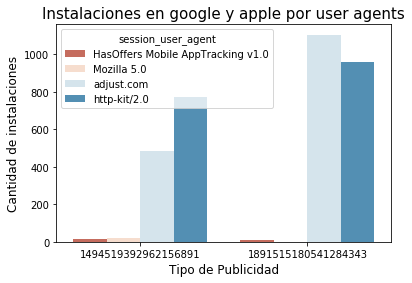

In [433]:
g5 = sns.countplot(x='ref_type', data=installs, palette='RdBu', hue='session_user_agent')
g5.set_title("Instalaciones en google y apple por user agents", fontsize =15)
g5.set_xlabel("Tipo de Publicidad", fontsize = 12)
g5.set_ylabel("Cantidad de instalaciones", fontsize = 12)

In [32]:
#auctions.loc[auctions['application_id'] == 28].T #"Dalvik", tambien 2, 4, 10,14,16,28
#installs.loc[installs['application_id'] == 15] # nextgen
#auctions.loc[auctions['application_id'] ==9] #mercadopago
#auctions.loc[auctions['application_id'] ==21] #peixelUrbano
#installs.loc[installs['application_id'] ==23] #takealot
#auctions.loc[auctions['application_id'] ==24] #hotelurbano

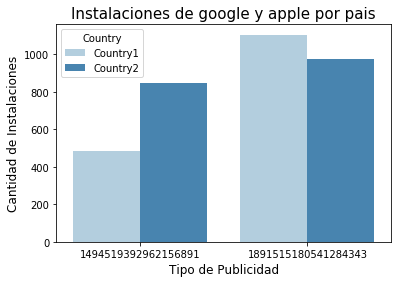

In [494]:
g5 = sns.countplot(x='ref_type', data=installs, palette='Blues', hue='device_countrycode')

g5.set_title("Instalaciones de google y apple por pais", fontsize =15)
g5.set_xlabel("Tipo de Publicidad", fontsize = 12)
g5.set_ylabel("Cantidad de Instalaciones", fontsize = 12)
plt.legend(title='Country', loc='upper left', labels=['Country1', 'Country2'])

In [328]:
# Todos los valores son de marzo 2019 de las semanas 10 y 11
installs['day'] = pd.DatetimeIndex(installs['created']).day;
installs['weekday'] = pd.DatetimeIndex(installs['created']).weekday;
installs['hour'] = pd.DatetimeIndex(installs['created']).hour;

# weekdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
# installs['weekday'].replace(weekdays, inplace=True)

Text(51.0, 0.5, 'Hora')

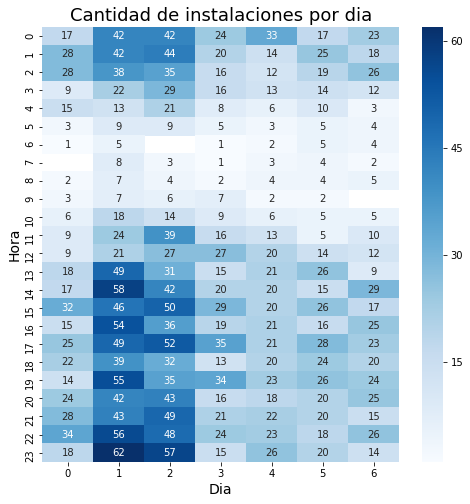

In [329]:
g = installs.groupby(['hour', 'weekday'])['weekday'].count().unstack()
plt.figure(figsize=(8, 8))
heap_map = sns.heatmap(g, cbar=True, cmap="Blues", annot=True)
heap_map.set_title("Cantidad de instalaciones por dia", fontsize=18)
heap_map.set_xlabel("Dia", fontsize=14)
heap_map.set_ylabel("Hora", fontsize=14)

[Text(0, 0, '2.33194661091417e+18'),
 Text(0, 0, '6.88241452041436e+18'),
 Text(0, 0, '2.616228068988996e+18'),
 Text(0, 0, '7.787530752469096e+18'),
 Text(0, 0, '2.9282623200704937e+18'),
 Text(0, 0, '9.14903648623246e+18'),
 Text(0, 0, '1.1876609915140178e+17'),
 Text(0, 0, '1.26767685640937e+18'),
 Text(0, 0, '5.990116681709081e+18'),
 Text(0, 0, '2.1369349693676012e+18'),
 Text(0, 0, '7.11634310093634e+18'),
 Text(0, 0, '2.0664313823771248e+17'),
 Text(0, 0, '1.7545278564638182e+18'),
 Text(0, 0, '2.983637540473392e+18'),
 Text(0, 0, '9.098443153716767e+18'),
 Text(0, 0, '8.656854488683104e+18'),
 Text(0, 0, '2.4354500947795727e+18'),
 Text(0, 0, '5.580204962374873e+18'),
 Text(0, 0, '8.163782690166158e+18'),
 Text(0, 0, '4.4452523127597215e+18')]

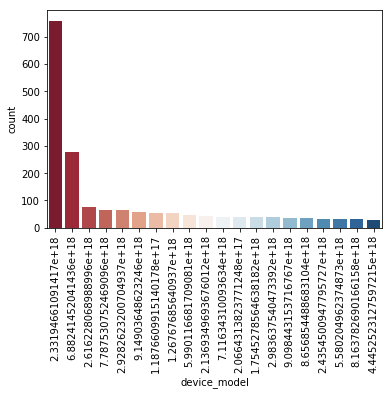

In [446]:
group = sns.countplot(x='device_model', data=installs, palette='RdBu', order=installs['device_model'].value_counts().iloc[:20].index)
group.set_xticklabels(group.get_xticklabels(), rotation=90)

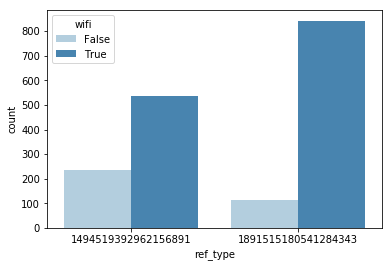

In [491]:
# hay mayor cantidad de instalaciones con wifi
g8= sns.countplot(x='ref_type', data=installs, palette='Blues', hue='wifi') 
# g8.legend(handles, ['Postulaciones', 'Vistas'], fontsize=14)
# plt.legend(title='Tipo de Publicidad', loc='upper left', labels=['google', 'apple'])

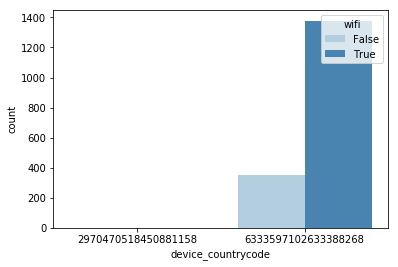

In [402]:
sns.countplot(x='device_countrycode', data=installs, palette='Blues', hue='wifi') # hay un pais que no tiene registros de instalaciones x wifi

[Text(0, 0, 'af_app_opened'),
 Text(0, 0, 'EVENT_OPEN_APP'),
 Text(0, 0, 'EVENT_HOMEPAGE'),
 Text(0, 0, 'login_success'),
 Text(0, 0, 'account_summary_first_step')]

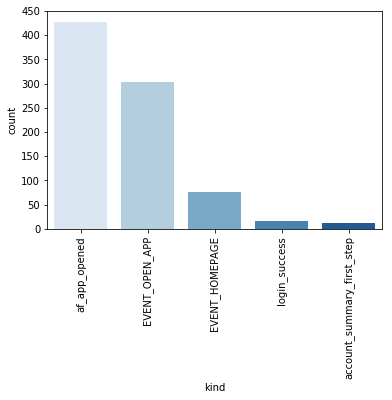

In [411]:
group = sns.countplot(x='kind', data=installs, palette='Blues', order=installs['kind'].value_counts().iloc[:5].index)
group.set_xticklabels(group.get_xticklabels(), rotation=90)

[Text(0, 0, '7'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '16'),
 Text(0, 0, '8'),
 Text(0, 0, '2'),
 Text(0, 0, '29'),
 Text(0, 0, '20'),
 Text(0, 0, '6'),
 Text(0, 0, '1'),
 Text(0, 0, '26'),
 Text(0, 0, '34'),
 Text(0, 0, '15'),
 Text(0, 0, '0'),
 Text(0, 0, '28'),
 Text(0, 0, '3'),
 Text(0, 0, '12'),
 Text(0, 0, '18'),
 Text(0, 0, '14'),
 Text(0, 0, '17')]

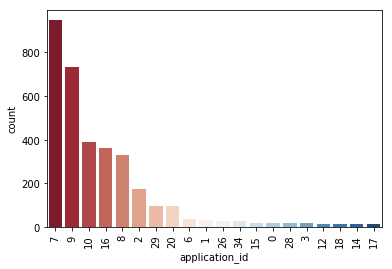

In [459]:
group = sns.countplot(x='application_id', data=installs, palette='RdBu', order=installs['application_id'].value_counts().iloc[:20].index)
group.set_xticklabels(group.get_xticklabels(), rotation=90)

In [500]:
installs.columns

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'attributed',
       'implicit', 'device_countrycode', 'device_brand', 'device_model',
       'session_user_agent', 'user_agent', 'event_uuid', 'kind', 'wifi',
       'trans_id', 'ip_address', 'device_language'],
      dtype='object')

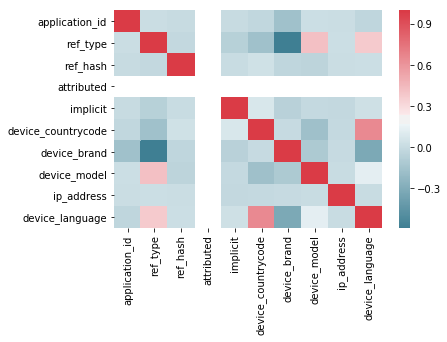

In [530]:
#corr = installs.corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220,10, as_cmap=True))

In [499]:
installs['application_id']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        2
10       2
11       2
12       2
13       2
14       2
15       2
16       2
17       2
18       2
19       2
20       2
21       2
22       2
23       2
24       2
25       2
26       2
27       2
28       2
29       2
        ..
3382     1
3383     1
3384     1
3385     1
3386     1
3387     1
3388     1
3389    36
3390    34
3391    34
3392    34
3393    34
3394    34
3395    34
3396    34
3397    34
3398    34
3399    34
3400    34
3401    34
3402    34
3403    34
3404    34
3405    34
3406    34
3407    34
3408    34
3409    19
3410    19
3411    13
Name: application_id, Length: 3412, dtype: category
Categories (31, object): [0, 1, 10, 12, ..., 6, 7, 8, 9]